### Analysis of deterministc approximation to the mitochondrial graph

Functionality of this notebook is similar to the accompanying python [script](./ode.py).  
Please feel free to adjust any of them to your needs.

Time-dependent behaviour of the mitochondria network can be represented as a system of differential-algebraic equations for the number of nodes $x_i$ of degrees $i$ = 1 to 3:  
\begin{array} 
\dot{x_1} = -a_2x_1x_2 + (3/2)bx_3 - a_1x_1(x_1-1) + 2bx_2 \\
\dot{x_2} = a_2x_1x_2 - (3/2)bx_3 \\
x_1 + 2x_2 +3x_3 = 2L
\end{array}
where $a_1$, $a_2$ and $b$ are ratec onstants for bulk fusion, side fusion and fission respectively. 

In [1]:
# uncomment to plot into separate windows
#%matplotlib   

import math
import numpy as np
from odes import node_numbers_equil, \
                 plot_node_numbers, \
                 plot_phase_equil, \
                 is_stable, \
                 plot_stability, \
                 plot_time_evol

In [2]:
# Initialize the parameters:

def a(m):
     """Initialize fusion rate constants."""
     init = -np.floor(2 * m / 3)
     return np.logspace(init, init + m - 1, num=m, base=2)

m1, m2, mL = 57, 57, 1        # grid dimensions
b = 1                         # fission rate constant
a1, a2 = a(m1), a(m2)         # fusion rate constant
c1, c2 = a1/b, a2/b           # reduced rates

L = [10000, 30000]            # total number of edges in the graph

#### The Steady state

Find the equilibrium solution as $t\rightarrow+\infty$  
using reduced parameters $c_1 = a_1/b$, $c_2 = a_2/b$:
\begin{align}
& 0 = c_1c_2x_1^3 + c_1(1 - c_2)x_1^2 + (1 - c_1)x_1 - 2L \\
& x_2 = c_1x_1(x_1 - 1)/2 \\
& x_3 = 2c_2x_1x_2/3
\end{align}

and plot it.

In [3]:
x = [[[node_numbers_equil(cc1, cc2, l) for cc1 in c1] for cc2 in c2] for l in L]

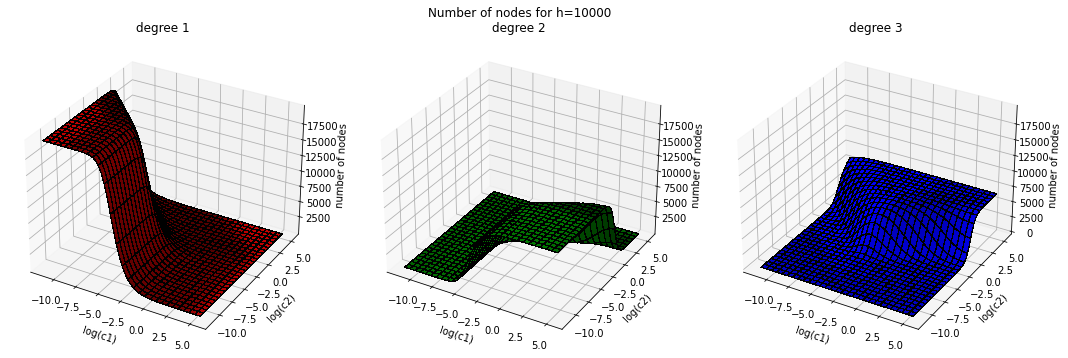

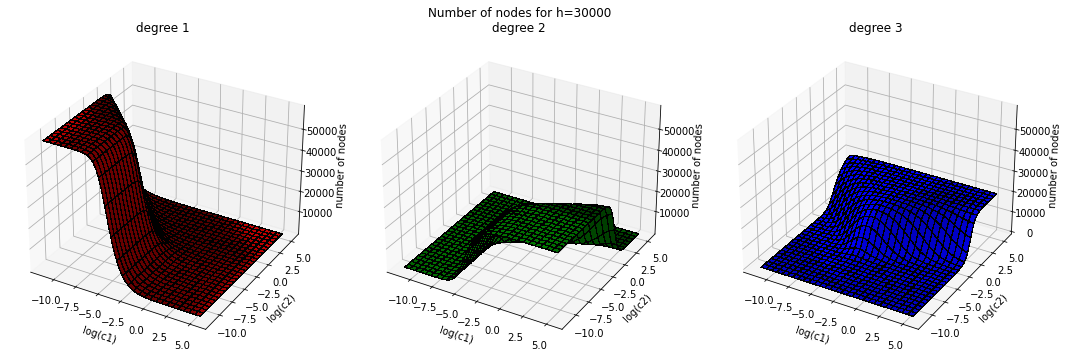

In [4]:
[plot_node_numbers(c1, c2, l, xx, figsize=(15, 5)) for xx, l in zip(x, L)];

Plot the solution in phase coordinates:

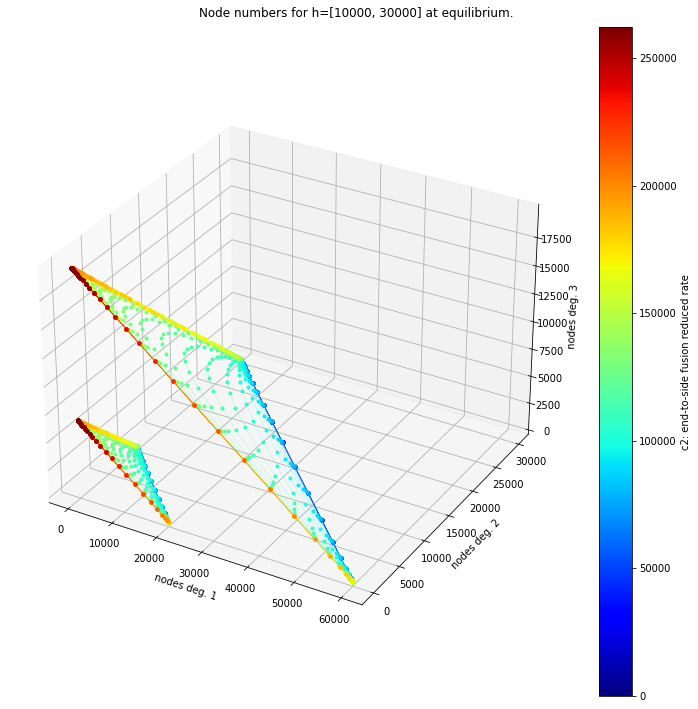

In [5]:
plot_phase_equil(x, c1, L, figsize=(10,10))

Examine the solution.
The equilibrium is asymptotically stable if real parts of all eigenvalues of the Jacobian are strictly negative.

In [6]:
st = [is_stable(xx, b, a1, a2, l) for xx, l in zip(x, L)]

Plot the stability map indicating stable and unstable solutions with blue and red markers respectively:

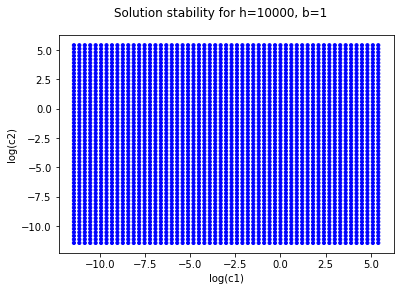

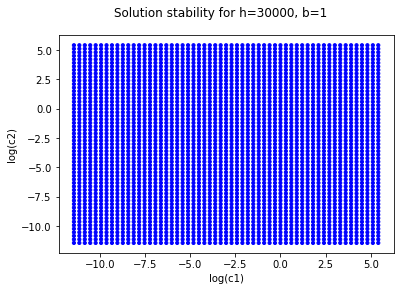

In [7]:
[plot_stability(b, c1, c2, l, s) for s, l in zip(st, L)];

#### Ttransient bechavior

Slove the ODEs directly for specific parameters and plot the results:

In [8]:
import scipy.integrate as spi
from odes import eqs, x2

Lt = L[0]                                   # graph total mass (in edges)
bt = b                                      # fission rate constant
a1t = a1[20]                                # end-to-end fusion rate constant
a2t = a2[30]                                # end-to-side fusion rate constant
tspan = [0., 20.]                           # time interval
tsol = np.linspace(tspan[0], tspan[1], 100) # time points for plotting
# initial values:
x1_0 = np.linspace(0, Lt, 10)
x3_0 = (Lt - x1_0) / 2

x123 = []
for x10, x30 in zip(x1_0, x3_0):
    # new scipy ivp solver: requires scipy >= 1.4:
    sol = spi.solve_ivp(eqs, t_span=tspan, y0=[x10, x30], args=(b, a1t, a2t, Lt), dense_output=True)
    x13 = sol.sol(tsol)
    x123.append([x13[0,:], x2(x13, Lt), x13[1,:]])

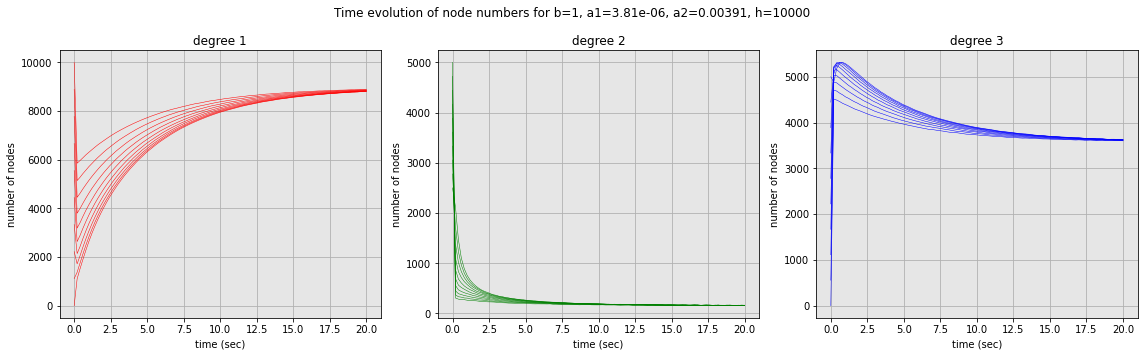

In [9]:
plot_time_evol(b, a1t, a2t, Lt, x123, tsol, figsize=(16, 5))